In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from PIL import Image
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
digits=load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.target.shape

(1797,)

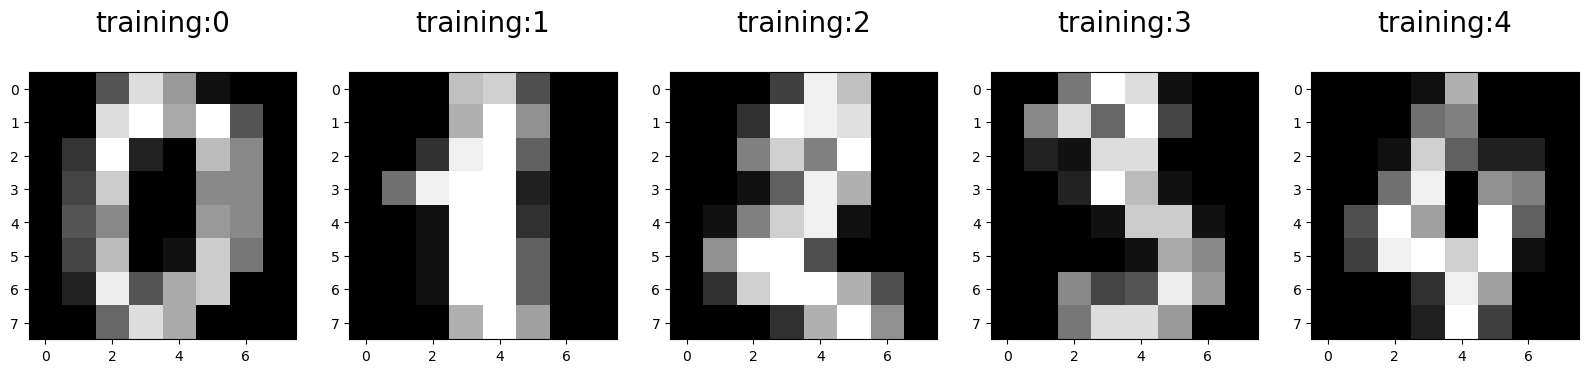

In [4]:
plt.figure(figsize=(20,4))
for i,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training:%i\n'%label,fontsize=20)

In [5]:
x_tr,x_te,y_tr,y_te=train_test_split(digits.data,digits.target,test_size=0.2,random_state=2)


In [6]:
x_tr.shape

(1437, 64)

In [8]:
clf=LogisticRegression()
clf.fit(x_tr,y_tr)
clf.predict(x_te[0:5])

C:\Users\madhu sudhana reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 0, 9, 1, 8])

In [9]:
clf.score(x_te,y_te)

0.9444444444444444

In [10]:
y_pred=clf.predict(x_te)

In [11]:
metrics.confusion_matrix(y_te,y_pred)

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 41,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 25]], dtype=int64)

In [25]:
joblib.dump(clf, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [12]:
model = joblib.load('logistic_regression_model.pkl')

In [14]:
image_path = 'three.png'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((8, 8))  # Resize to match the expected input size
image_array = np.array(image)  # Convert to NumPy array
flattened_image = image_array.flatten().reshape(1, -1)

In [15]:
prediction = model.predict(flattened_image)

# Print or use the prediction as needed
print(f"The predicted number is: {prediction[0]}")

The predicted number is: 3
